### <center> <b> Final Project Report </b> </center>

#### <center> Retail Domain </center>

**Team Members**: Abiram Vyas, Nidhi Choudhary, Indu Varshini Jayapal

### Question of Interest


* The point we are trying to analyse is to see the product information of womens' shoes from the Datafinity Product Database
* We are trying to analyze possible patterns in terms of price points of various brands along with the ranges in price
* Finally we are trying to find a style of shoe which has a large variation in the price while also looking at any popular color in the database

### Source and Short Description of the data

**Data Source**: https://data.world/datafiniti/womens-shoe-prices

**Short Description of the data**:

This is a list of 10,000 women's shoes and their product information provided by Datafiniti's Product Database. The dataset mainly talks about key features such as
<li> shoe name </li>
<li> shoe brand </li>
<li> shoe price </li>
<li> shoe links </li>

Some of the data is blank or has a lot of missing rows for which data cleaning is to be done

### Possible sources of bias

Presence of luxury brands might skew the average price of shoes in a particular direction. This could possibly lead to the distribution of prices to NOT be normally centered around the mean

## Section 1: Data Preprocessing

<b> In this section we aim at doing the following -  </b>


    1.1 Loading the data from the URL

    1.2 Null Value treatment

    1.3 Removal of unnecessary columns

    1.4 Data Type Conversion

    1.5 Binning values in columns to reduce the cardinality

      1.5.1 Clubbing brands that have empty values into a bin called "Unbranded"

      1.5.2 Combining shoe types into broad categories such as "sandals","boots", etc.


### Section 1.1 Loading Data and summarizing the same

In [1]:
'''
We are importing required libraries
pandas: data wrangling
matplotlib : data visualization
seaborn : data visualization
warning : ignoring warnings in print message
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
'''
We import the data from the specified URL and we aim to see the summary of the data available
head() : first 5 records
info() : summary of data
'''
womens_raw_data = pd.read_csv('https://query.data.world/s/5ieff32pjxf65ikv4hj2oqjptx7spo?dws=00000')
womens_raw_data.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,NaN,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...",NaN,...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,NaN,NaN,NaN,"8.5,7,7.5,8",NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11,NaN,NaN


In [3]:
womens_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19045 non-null  object 
 1   asins                2208 non-null   object 
 2   brand                18412 non-null  object 
 3   categories           19045 non-null  object 
 4   colors               11889 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            19045 non-null  object 
 7   dateUpdated          19045 non-null  object 
 8   descriptions         10780 non-null  object 
 9   dimension            2418 non-null   object 
 10  ean                  9816 non-null   float64
 11  features             14108 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            17840 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 19045 non-null 

### Section 1.2 Null Value treatment

In [4]:
def null_check(df):
  '''
  Goal: Analyzing the various NaNs across the columns in the dataframe
  Input:
        1. df - dataframe
  Output:
        1. missing_values_summary - summary statistics of all columns in df
  '''

  nan_values = df.isna().sum().sort_values(ascending = False)
  percentage_nan = 100*nan_values/df.shape[0]
  missing_values_summary = pd.concat([nan_values, percentage_nan], axis = 1).rename({0 : '#missing values', 1 : '%of missing values'}, axis = 1)
  return missing_values_summary

missing_values_summarized = null_check(womens_raw_data)
missing_values_summarized

,#missing values,%of missing values
isbn,19045,100.000000
count,19045,100.000000
flavors,19045,100.000000
websiteIDs,19044,99.994749
quantities,19043,99.989499
prices.source,19041,99.978997
prices.flavor,19039,99.968496
prices.count,19038,99.963245
prices.warranty,19025,99.894986
prices.availability,18910,99.291153


#### Section 1.2.1 Dropping Columns based on a threshold

In [5]:
'''
Of the 47 columns in the dataset, 15 columns have more than 90% NaN and 7 columns have between 50% and 90% NaNs. Creating a cutoff
of 50% to drop the columns which have null percentage greater than the cutoff

Input :
        1. df - dataframe (womens_raw_data)
        2. thresh - threshold (cutoff)
Output :
        1. missing_df - dataframe with the missing value percentage across columns
        2. df_new - cleaned data
'''

def col_drop(df,thresh):
  df_new = df.dropna(thresh= len(df) * thresh, axis=1)
  nans = df_new.isna().sum().sort_values(ascending = False)
  pct = 100*nans/df_new.shape[0]
  missing_df = pd.concat([nans, pct], axis = 1).rename({0 : '#missing values', 1 : '%of missing values'}, axis = 1)
  return missing_df,df_new

missing,df_new = col_drop(womens_raw_data,0.5)

In [6]:
df_new.head()

,id,brand,categories,colors,dateAdded,dateUpdated,descriptions,ean,features,imageURLs,...,prices.amountMax,prices.condition,prices.currency,prices.dateAdded,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,sourceURLs,upc
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,...,71.99,NaN,USD,2016-11-11T09:49:00Z,2016-11-02T00:00:00Z,TRUE,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,...,250,new,USD,2016-11-11T09:49:00Z,2016-10-27T00:00:00Z,FALSE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,...,75.99,new,USD,2016-11-11T09:49:00Z,2016-10-27T00:00:00Z,TRUE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,...,79.98,new,USD,2016-11-11T09:49:00Z,2016-11-09T00:00:00Z,TRUE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...",7.631810e+11,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,...,26.98,NaN,USD,2016-11-16T12:56:36Z,2016-11-09T00:00:00Z,TRUE,NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11


### Section 1.3 Removing redundant columns

In [7]:
'''
UPC, EAN, ID and KEYS are some of the identity columns. Understanding which columns is well populated to uniquely identify the row
It looks like the ID columns has 10000 unique values which is line with the total rows in the dataframe
'''
df_new[['upc','ean','id','keys']].head()

,upc,ean,id,keys
0,NaN,NaN,AVpfBXx21cnluZ0-cKxs,zoot/z130103201090
1,NaN,NaN,AVpfBXx21cnluZ0-cKxs,zoot/z130103201090
2,NaN,NaN,AVpfBXx21cnluZ0-cKxs,zoot/z130103201090
3,NaN,NaN,AVpfBXx21cnluZ0-cKxs,zoot/z130103201090
4,7.63181E+11,7.631810e+11,AVpfEqFRLJeJML431x7w,"wildpair/colfaxcog,0763181233352,763181233352"


In [8]:
print("UPC Unique_counts",df_new['upc'].nunique())
print("EAN Unique_counts",df_new['ean'].nunique())
print("ID Unique_counts",df_new['id'].nunique())
print("Keys Unique_counts",df_new['keys'].nunique())

UPC Unique_counts 2598
EAN Unique_counts 2127
ID Unique_counts 10000
Keys Unique_counts 9983


In [9]:
'''
Dropping the columns UPC, EAN and KEYS since they do not provide much insight into what we need
'''
df_new = df_new.drop(['upc','ean','keys'], axis=1)
df_new.columns

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'features', 'imageURLs', 'manufacturerNumber',
       'merchants', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.condition', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.sourceURLs', 'sourceURLs'],
      dtype='object')

### Section 1.4 Datatype Conversion

We have a date column `prices.dateAdded` apart from `dateAdded`, `dateUpdated` and `prices.dateSeen`

In [10]:
'''
The prices.dateAdded column is redundant so there is a need to remove it
Converting the remainder date based columns to datetime datatype
'''
df_new = df_new.drop(['prices.dateAdded'], axis=1)
df_new['dateAdded']= pd.to_datetime(df_new['dateAdded'])
df_new['dateUpdated']= pd.to_datetime(df_new['dateUpdated'])
df_new['price.dateSeen']= pd.to_datetime(df_new['dateUpdated'])
d = {'TRUE': True, 'FALSE': False}
df_new['prices.isSale'] = df_new['prices.isSale'].map(d)
print(df_new.shape)
print(df_new.columns)

(19045, 22)
Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'descriptions', 'features', 'imageURLs', 'manufacturerNumber',
       'merchants', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.sourceURLs', 'sourceURLs',
       'price.dateSeen'],
      dtype='object')


### Section 1.5 Binning to reduce cardinality

#### 1.5.1 Clubbing the "brand" column into buckets

In [11]:
'''
In the data, there are various names that can be clubbed into the unbranded bucket
1. First - replacing special characters in brand
2. Make a list of terms that can fall under the unbranded bucket
3. Make the changes in the original data

Apart from this, there is a need to group small brands which have a low count
1. Filter for value_counts() < n where n is the cutoff
2. Give a tag of small brands to those that fall in the bracket of the previous step

Expected output - Out of around 2000 brands, the count would have fallen to around 200
'''

df_new['brand'] = df_new['brand'].str.upper().str.strip().str.replace('@', 'a',  regex=True)
unbranded = ['UNBRANDED/GENERIC','NON-BRANDED', 'GENERIC SURPLUS','GENERIC','UNBRAND','FAMOUS NAME BRAND']
df_new['brand'].replace(unbranded, 'UNBRANDED', inplace = True)
df_new['brand'].fillna("UNBRANDED", inplace = True)

ls = df_new['brand'].value_counts()[df_new['brand'].value_counts() < 20]
ls = list(ls.index)
temp1 = df_new['brand'].isin(ls)
df_new.loc[temp1, 'brand'] = 'small brands'
df_new['brand'] = df_new['brand'].str.upper()
df_new['brand'].value_counts(normalize=True)

SMALL BRANDS     0.398530
UNBRANDED        0.040746
RALPH LAUREN     0.028616
NIKE             0.019375
TOMS             0.017222
                   ...   
TAFFY            0.001050
P-JIW            0.001050
TAHARI BY ASL    0.001050
KEDS             0.001050
SHOEVIBE         0.001050
Name: brand, Length: 190, dtype: float64

#### 1.5.2 Clubbing shoe types into broader categories

In [12]:
'''Quickly checking the value counts before we group things
Initial analysis state that there are records in categories that have a category that is not "shoes"
We can remove those
'''

print(df_new['categories'].value_counts())
not_shoes = 'boy|skirt|accessories|jewelry|bag|luggage'
df_new.drop(df_new[df_new['categories'].str.lower().str.contains(not_shoes)].index, inplace = True)
print(df_new.shape)

Shoes,Women's Shoes,Clothing,All Women's Shoes                                                                                        2887
Clothing,Shoes,Women's Shoes,All Women's Shoes                                                                                        2313
Shoes,Clothing,Women's Shoes,All Women's Shoes                                                                                        2064
Athletic,Women,Shoes,Shoes & Handbags                                                                                                  363
Women,Shoes,Boots                                                                                                                      223
                                                                                                                                      ... 
Clothing,Clothing, Shoes & Jewelry,Women,Coats, Jackets & Vests,Trench, Rain & Anoraks,Trench Coats                                      1
Clothing, Shoes & Accessori

In [13]:
'''
There are various categories of shoes in the dataset that fall mainly under the category of boots, heels, sandals etc.
Goal is to find these occurrences and replace them with the broader category thereby reducing the cardinality

Output :
        A cleaned categories column that has only a small set of categories
'''
boots = 'boots|boot|bootie|booties|calf|leather|work|oxfords|pu|paten'
df_new.loc[df_new['categories'].str.lower().str.contains(boots), 'categories'] = 'Boots'

heels = 'pump|heels|stiletto|wedge|platform'
df_new.loc[df_new['categories'].str.lower().str.contains(heels), 'categories'] = 'Heels'

sandals = 'sandal|gladiator|flip|flop|slipper|slide|flat'
df_new.loc[df_new['categories'].str.lower().str.contains(sandals), 'categories'] = 'Sandals'


sports = 'walking|cleats|access|athletic|basketball|golf|sport|run|running|trainin|gym|fitness|climb|soccer|outdoor|hiking|hike|skecher|balance|fila|asics|Easy Spirit|trainer|adidas|puma|reebok|nike'
df_new.loc[df_new['categories'].str.lower().str.contains(sports), 'categories'] = 'Sports'

causual = 'comfort|toning|patio|sinclair|casual|contemporary|sneaker|slip-on|clog|round|toe|converse|canvas|mule|moccasin|flat|Bahama|espadrille|loafer|skechers'
df_new.loc[df_new['categories'].str.lower().str.contains(causual), 'categories'] = 'Causual'

kids = 'kid|girl|child|school|uniform|toy'
df_new.loc[df_new['categories'].str.lower().str.contains(kids), 'categories'] = 'Kids'

design = 'design'
df_new.loc[df_new['categories'].str.lower().str.contains(design), 'categories'] = 'Design'

women_shoes = 'women|woman'
df_new.loc[df_new['categories'].str.lower().str.contains(women_shoes), 'categories'] = 'Other Women Shoes'

print(df_new['categories'].value_counts())

Other Women Shoes    7822
Sandals              1113
Boots                 881
Causual               652
Sports                486
Heels                   5
Kids                    2
Design                  1
Name: categories, dtype: int64


In [14]:
df_new.head()

,id,brand,categories,colors,dateAdded,dateUpdated,descriptions,features,imageURLs,manufacturerNumber,...,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,sourceURLs,price.dateSeen
0,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,71.99,71.99,NaN,USD,2016-11-02T00:00:00Z,True,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
1,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,250,250,new,USD,2016-10-27T00:00:00Z,False,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
2,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,75.99,75.99,new,USD,2016-10-27T00:00:00Z,True,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
3,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,79.98,79.98,new,USD,2016-11-09T00:00:00Z,True,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
4,AVpfEqFRLJeJML431x7w,WILD PAIR,Other Women Shoes,Brown,2016-11-16 12:56:36+00:00,2016-11-16 12:56:36+00:00,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...","[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,COLFAX-COG,...,26.98,26.98,NaN,USD,2016-11-09T00:00:00Z,True,NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,2016-11-16 12:56:36+00:00


In [15]:
#Saving to CSV incase one needs a checkpoint
df_new.to_csv('data_womens_shoes.csv',index = False)

## Section 2: Visualizations

<b> In this section we aim at doing the following -  </b>


    2.1 Data Cleaning of color and price column

    2.2 Column renaming + datatype change

    2.3 Visualization 1

    2.4 Visualization 2

    2.5 Visualization 3

    2.6 Visualization 4


### Section 2.1 Data Cleaning of brand and color column

In [16]:
df_new['colors'].fillna('No_Color', inplace=True)
df_new['brand'].value_counts()

SMALL BRANDS       3579
RALPH LAUREN        535
TOMS                327
NIKE                246
MUK LUKS            235
                   ... 
DOLCE & GABBANA       2
DDI                   2
JONES NEW YORK        1
BONGO                 1
DICKIES               1
Name: brand, Length: 138, dtype: int64

### Section 2.2 Column Renaming + Datatype change

In [17]:
def type_conversion(data1):

  '''
  Input :
        1. Dataframe -  data1
  Output :
        1. Dataframe - typecasted dataframe
  '''
  for i in data1.columns:
      try:
          data1[i] = data1[i].astype(float)
      except ValueError:
          data1[i]=data1[i]
      except TypeError:
          data1[i]=data1[i]
  return data1

df_new.rename(columns={"prices.amountMax": "PriceMax"}, inplace=True)
# df_new['PriceMax'] = df_new['PriceMax'].str.replace('[^\d.]', '', regex=True)
df_new['PriceMax'] = pd.to_numeric(df_new['PriceMax'], errors='coerce')
df_new = df_new.drop(df_new[df_new['brand'] == "UNBRANDED"].index) #Avoiding unbranded in the analysis

print("Before typecasting \n", df_new.dtypes)
df_new=type_conversion(df_new)
print("\n")
print("After typecasting \n", df_new.dtypes)

Before typecasting 
 id                                 object
brand                              object
categories                         object
colors                             object
dateAdded             datetime64[ns, UTC]
dateUpdated           datetime64[ns, UTC]
descriptions                       object
features                           object
imageURLs                          object
manufacturerNumber                 object
merchants                          object
name                               object
prices.amountMin                   object
PriceMax                          float64
prices.condition                   object
prices.currency                    object
prices.dateSeen                    object
prices.isSale                      object
prices.merchant                    object
prices.sourceURLs                  object
sourceURLs                         object
price.dateSeen        datetime64[ns, UTC]
dtype: object


After typecasting 
 id                 

In [18]:
df_new.head()

,id,brand,categories,colors,dateAdded,dateUpdated,descriptions,features,imageURLs,manufacturerNumber,...,prices.amountMin,PriceMax,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,sourceURLs,price.dateSeen
0,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,71.99,71.99,NaN,USD,2016-11-02T00:00:00Z,1.0,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
1,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,250,250.00,new,USD,2016-10-27T00:00:00Z,0.0,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
2,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,75.99,75.99,new,USD,2016-10-27T00:00:00Z,1.0,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
3,AVpfBXx21cnluZ0-cKxs,SMALL BRANDS,Other Women Shoes,"Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Z130103201090,...,79.98,79.98,new,USD,2016-11-09T00:00:00Z,1.0,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,2016-11-11 09:49:00+00:00
4,AVpfEqFRLJeJML431x7w,WILD PAIR,Other Women Shoes,Brown,2016-11-16 12:56:36+00:00,2016-11-16 12:56:36+00:00,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...","[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,COLFAX-COG,...,26.98,26.98,NaN,USD,2016-11-09T00:00:00Z,1.0,NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,2016-11-16 12:56:36+00:00


In [19]:
df_new.shape

(10851, 22)

### Section 2.3 Visualization 1

(0.0, 1000.0)

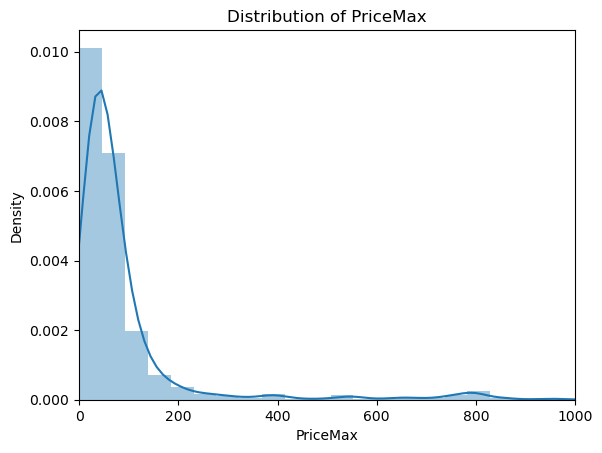

In [20]:
'''
Plot Name - Distribution Plot
Visualization Goal - To represent the proportion of data in each bin
Output Analysis - 90% of the shoes have a price of less than $200
'''

plt.title("Distribution of PriceMax")
plt.xlabel("PriceMax")
plt.ylabel("Density")
sns.distplot(df_new['PriceMax'], kde=True, bins=50)
plt.xlim(xmin=0, xmax=1000)

### Section 2.4 Visualization 2

#### Section 2.4.1 Data Prep for visualization

In [21]:
'''
Goal is to understand the fluctuation of the data for each brand
Creating a top_brands and bottom_brands dataframe to get the N brands that have a lot of fluctuations and those that do not have
flunctuations
Steps -
      1. Aggregating based on the Brand column and getting the range of pricemax
      2. Sorting the values of step 1 in descending order of range (Top Brands)
      2. Sorting the values of step 1 in ascending order of range (Bottom Brands)
'''

price_range_by_brand = df_new.groupby("brand")["PriceMax"].agg(lambda x: x.max() - x.min())

price_range_by_brand = price_range_by_brand.sort_values(ascending=False)
top_n = 10
top_brands = price_range_by_brand.head(top_n)

price_range_by_brand_low = price_range_by_brand.sort_values(ascending=True)
bottom_n = 10
bottom_brands = price_range_by_brand_low.head(bottom_n)

In [22]:
top_brands

brand
GUCCI                   1640.00
SMALL BRANDS            1484.01
RALPH LAUREN            1425.01
PRADA                    931.00
VALENTINO                680.00
DOLCE & GABBANA          485.01
VINCE                    352.01
FRYE                     346.01
MICHAEL MICHAEL KORS     333.01
VIA SPIGA                301.01
Name: PriceMax, dtype: float64

In [23]:
bottom_brands

brand
JONES NEW YORK       0.00
DICKIES              0.00
BONGO                0.00
RUBIE'S COSTUMES     8.14
EASYCOMFORTS        21.79
FADED GLORY         24.10
LEG AVENUE          26.27
SODA                27.05
MO MO               28.97
DEARFOAMS           29.23
Name: PriceMax, dtype: float64

#### Section 2.4.2 Plot for Visualization 2

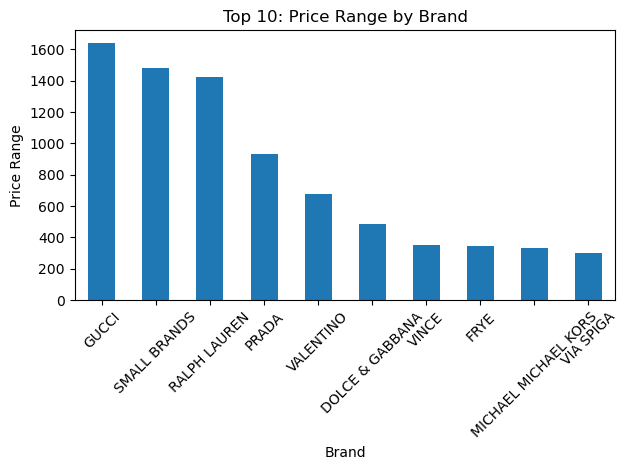

In [24]:
'''
Plot Name - Bar Plot
Visualization Goal - To represent the distribution of the price range by brand
Output Analysis - Gucci has the highest range of $1600 dollars in its price, followed by Ralph Lauren and Prada
'''

#Price Range by Brand for top 10 brands
top_brands.plot(kind="bar")
plt.title("Top 10: Price Range by Brand")
plt.xlabel("Brand")
plt.ylabel("Price Range")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

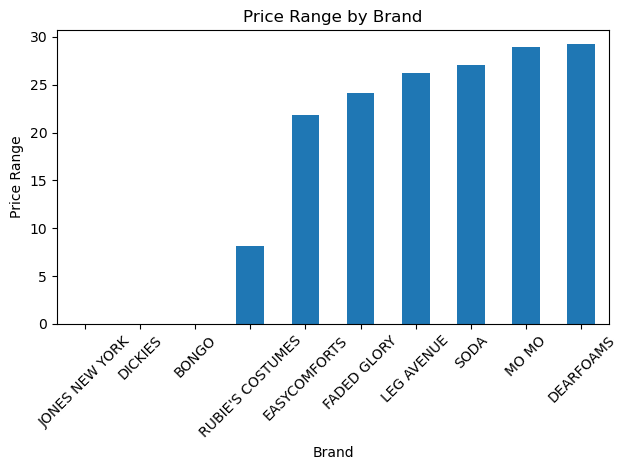

In [25]:
'''
Plot Name - Bar Plot
Visualization Goal - To represent the distribution of the price range by brand
Output Analysis - Jones New York,Dickies and Bongo have the least range since there is no price fluctuation in its brand
'''

#Price Range by Brand for bottom 10 brands
bottom_brands.plot(kind="bar")
plt.title("Price Range by Brand")
plt.xlabel("Brand")
plt.ylabel("Price Range")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

### Section 2.5 Visualization 3

Text(0, 0.5, 'Maximum Price')

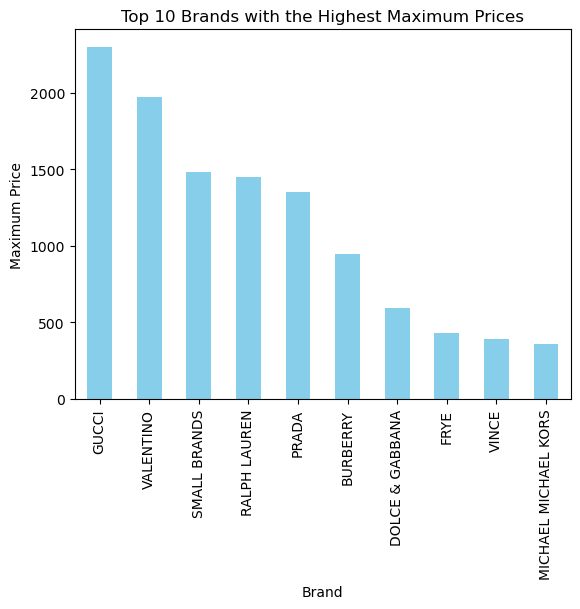

In [26]:
'''
Plot Name - Bar Plot
Visualization Goal - To represent the top 10 brands with the maximum prices
Output Analysis - Gucci has the most premium pricing amongst the brands available followed by Valentino and Ralph Lauren
'''

brand_max_prices = df_new.groupby("brand")["PriceMax"].max()
brand_max_prices = brand_max_prices.sort_values(ascending=False)
top_n = 10
top_brands = brand_max_prices.head(top_n)
top_brands.plot(kind="bar", color='skyblue')
plt.title("Top 10 Brands with the Highest Maximum Prices")
plt.xlabel("Brand")
plt.ylabel("Maximum Price")

### Section 2.6 Visualization 4

Text(0, 0.5, 'Count')

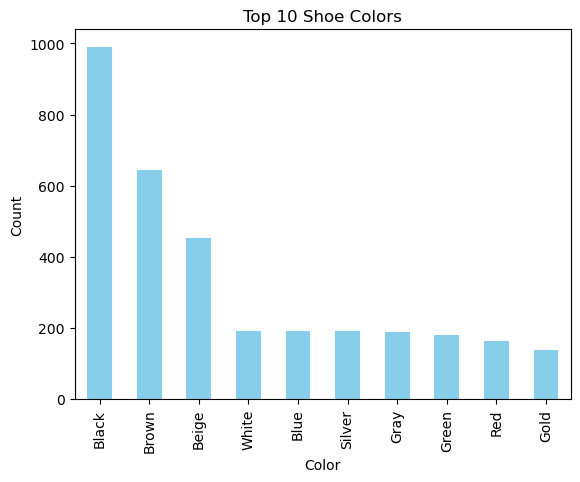

In [27]:
'''
Plot Name - Bar Plot
Visualization Goal - To represent the top 10 shoe colors
Output Analysis - Black is the most frequently present shoe color in the dataset (could be because of a lot of demand)
'''

df_new1 = df_new[df_new.colors != 'No_Color']
color_counts = df_new1['colors'].value_counts()
top_n = 10
top_colors = color_counts.head(top_n)
top_colors.plot(kind="bar", color='skyblue')
plt.title(f"Top {top_n} Shoe Colors")
plt.xlabel("Color")
plt.ylabel("Count")

## Section 3: One analysis with source code and explanations

#### <b> Analysis </b>

The assumption is that there would be atleast a couple of categories of shoes that would have a very high range in the prices. The assumption would be that one of heels, sandals or boots might have a higher range of values considering the variety of options present

In [28]:
#Price Range by shoe categories
price_range_by_shoe = df_new.groupby("categories")["PriceMax"].agg(lambda x: x.max() - x.min())

In [29]:
price_range_by_shoe

categories
Boots                2292.01
Causual               690.01
Design                  0.00
Heels                1025.05
Kids                   90.99
Other Women Shoes     994.01
Sandals              1293.01
Sports                654.01
Name: PriceMax, dtype: float64

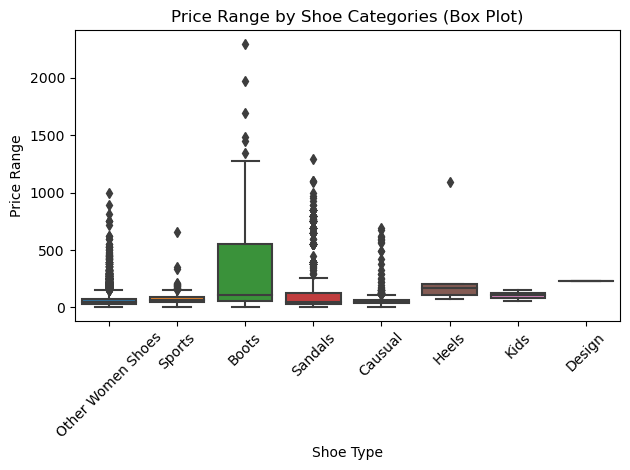

In [30]:
sns.boxplot(x='categories', y='PriceMax', data= df_new)
plt.title("Price Range by Shoe Categories (Box Plot)")
plt.xlabel("Shoe Type")
plt.ylabel("Price Range")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

<b> Analysis Outcome </b>

The assumption holds good since the box plot graph confirms our assumption

<b> Reason behind boxplot </b> - This is a plot that would show the variability of values in a dataset and showcases the median, upper and lower quartiles as well as min and max values

<b> Finding from boxplot </b> - the range in boots is from somewhere close to  `$`50 and the maximum value is around `$`2500 dollars. The category that has the least variability is the kids category with the boxplot being tighlty coupled right from the min value to the max value

## Section 4: Conclusion

From the Data, we are able to make a variety of conclusions -

<b> 1. Black is the preferred color </b> - In the dataset, it looks like more than 20% of the styles present have black as the color

<b> 2. Designer brands have large variation </b> - Prices in brands such as Gucci, Ralph Lauren and Prada where as brands such as Dickies, Jones New York have no variation in prices

<b> 3. Shoe price is less than `$`200 </b> - Shoe prices as seen in the distirbution are more or less constrained withing 200 dollars. This contributes to around 90%. Designer brands result in very high dollar value for the prices. If designer brands were to be removed, we could possible centralize the distribution to around $200 rather than it being heavily left skewed

<b> 4. Gucci has the maximum price </b> - Amongst all brands in the dataset, Gucci has products that have the maximum price

<b> 5. Boots for the win </b> - Based on the boxplot for price variation in shoes, it is seen that boots have the maximum variation amongst all categories of shoes

## Section 5 - Future Work

* Scope the problem to Mens shoes to check for any patterns or correlation
* Trend analysis of the sale of luxury brands
* Further analysis of price fluctuation - reasons behind sudden price drops etc.